<a href="https://colab.research.google.com/github/ChihabEddine98/AmazonAnalysis/blob/main/AmazonAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO LIST
--------


- [x] Genral collect for dataset
- [ ] Complete dataset
- [x] Make settings in an external file
- [ ] Make settings in an external file
- [ ] Make requirement installations in another file
- [ ] Clean Data & prepocessing
- [ ] Stemming / Lemmitization
- [ ] Replace Review Cleaning data by apply 


In [ ]:
from google.colab import files
files.upload()

{}

# Requirements Installations

In [ ]:
# Run just once 
!pip install webdriver-manager
!pip install selenium
!pip install requests
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
# imports
import os
import sys
import requests as rq
import numpy as np
import pandas as pd
import re 
import spacy
import string
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.utils import ChromeType
import unicodedata
import pickle as pk
# end imports

# Part 01  : Data Gathering

In [ ]:
settings_file = open("settings.pkl", "rb")
prod_urls = pk.load(settings_file)

## Scrapping Product Information

In [ ]:
'''
# Scrapping Product Data 
def product_scrapper(driver,prod_category,prod_url):
    driver.get(prod_url)
    prod_soup = BeautifulSoup(driver.page_source,'html.parser')

    # Product Info
    prod_title = prod_soup.find('span',{'id' : 'productTitle' }).text
    prod_brand = prod_soup.find('a',{'id' : 'bylineInfo' }).text
    prod_rate = prod_soup.find('span',{'class' : 'a-icon-alt' }).text
    prod_eval = prod_soup.find('span',{'id' : 'acrCustomerReviewText' }).text
    try :
      prod_price = prod_soup.find('span',{'id' : 'priceblock_ourprice' }).text
    except AttributeError:
      prod_price = '0'

    result = tuple(map(lambda x : unicodedata.normalize("NFKD",x.strip()),[prod_title,prod_brand,prod_rate,prod_eval,prod_price,prod_category]))
    return result

'''

'\n# Scrapping Product Data \ndef product_scrapper(driver,prod_category,prod_url):\n    driver.get(prod_url)\n    prod_soup = BeautifulSoup(driver.page_source,\'html.parser\')\n\n    # Product Info\n    prod_title = prod_soup.find(\'span\',{\'id\' : \'productTitle\' }).text\n    prod_brand = prod_soup.find(\'a\',{\'id\' : \'bylineInfo\' }).text\n    prod_rate = prod_soup.find(\'span\',{\'class\' : \'a-icon-alt\' }).text\n    prod_eval = prod_soup.find(\'span\',{\'id\' : \'acrCustomerReviewText\' }).text\n    try :\n      prod_price = prod_soup.find(\'span\',{\'id\' : \'priceblock_ourprice\' }).text\n    except AttributeError:\n      prod_price = \'0\'\n\n    result = tuple(map(lambda x : unicodedata.normalize("NFKD",x.strip()),[prod_title,prod_brand,prod_rate,prod_eval,prod_price,prod_category]))\n    return result\n\n'

## Scrapping Reviews Data

In [ ]:
# Scrapping Reviews Data
def reviews_scrapper(driver,prod,rev_url,ds):
    driver.get(rev_url)
    rev_soup = BeautifulSoup(driver.page_source,'html.parser')
    reviews_div = rev_soup.find_all('div',{'class':reviews_div_cls})

    for review in reviews_div:
        try :
          review_title = review.find('a',{'data-hook' : 'review-title'}).text
        except AttributeError:
          review_title = 'Null'
        
        try :
          review_rate = review.find('i',{'data-hook' : 'review-star-rating'}).text
        except AttributeError:
          review_rate = '0'
        
        review_body = review.find('span',{'data-hook' : 'review-body'}).text
        
        try :
          review_help = review.find('span',{'data-hook' : 'helpful-vote-statement'}).text
        except AttributeError:
          review_help = '0'
        try :
          review_home= review.find('span',{'data-hook' :'review-date'}).text 
        except AttributeError:
          review_home ='0'   
        
        rev_result = tuple(map(lambda x : unicodedata.normalize("NFKD",x.strip()),[review_title,review_rate,review_body,review_help,review_home]))
        ds.append(rev_result+(prod,))

    return ds

## Testing data collect

## Setup the web-driver 

In [ ]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options = options)

## Scrapping Products

In [ ]:
'''
lst_prod = [] 
for category,products in prod_urls.items():
    for prod in products:
        product = product_scrapper(driver,category,prod['prod_url'])+(prod['rev_count'],prod['prod_id'])
        lst_prod.append(product)




df_prod = pd.DataFrame(lst_prod)
df_prod.columns = prod_cols
df_prod
'''

"\nlst_prod = [] \nfor category,products in prod_urls.items():\n    for prod in products:\n        product = product_scrapper(driver,category,prod['prod_url'])+(prod['rev_count'],prod['prod_id'])\n        lst_prod.append(product)\n\n\n\n\ndf_prod = pd.DataFrame(lst_prod)\ndf_prod.columns = prod_cols\ndf_prod\n"

## Scrapping Reviews Data




In [ ]:
# This function help us to generate the dataset of reviews
# and also the dataframe of several products
'''
lst_rev = []
for category,products in prod_urls.items():
    for prod in products:
        for i in range(1,prod['rev_pages']+1):
            lst_rev = reviews_scrapper(driver,prod['prod_id'],f'{prod["rev_url"]}&pageNumber={i}',lst_rev) 

df_rev = pd.DataFrame(lst_rev)
df_rev.columns = rev_cols

 
df_rev.to_csv("reviews_dataset.csv",index = False)
'''


'\nlst_rev = []\nfor category,products in prod_urls.items():\n    for prod in products:\n        for i in range(1,prod[\'rev_pages\']+1):\n            lst_rev = reviews_scrapper(driver,prod[\'prod_id\'],f\'{prod["rev_url"]}&pageNumber={i}\',lst_rev) \n\ndf_rev = pd.DataFrame(lst_rev)\ndf_rev.columns = rev_cols\n\n \ndf_rev.to_csv("reviews_dataset.csv",index = False)\n'

# Part 02 : Data Cleaning

In [ ]:

# Clean Review Body
def clean_review_body(rev):
  # Make text to lowerCase
  clean_rev = rev.lower()
  # Remove ponctuation like .,!? etc
  clean_rev = clean_rev.translate(str.maketrans('','',string.punctuation))
  # Remove words that contain numbers
  clean_rev = re.sub(r'\w*\d\w*','',clean_rev)
  return clean_rev
  
# Clean reviews DataFrame 
def clean_reviews(df_rev):
    # Cleaning Hlp Review
    df_rev['Rev_Hlp'] = df_rev.Rev_Hlp.apply(lambda x: re.sub("[^0-9]","",x))
    # Cleaning Rate review  
    df_rev['Rev_Rate'] = df_rev.Rev_Rate.str.split(' ').apply(lambda x: float(x[0].replace(',','.')))
    # Cleaning Home Review
    df_rev['Rev_Home'] = df_rev.Rev_Home.str.split(' ').apply(lambda x: x[2])

    # Cleaning the body of the review
    # Convert the letter into lowercase
    # Remove ponctuation like .,!? etc
    df_rev['Rev_Bdy'] = df_rev.Rev_Bdy.apply(lambda x: clean_review_body(x))
    
    df_rev = df_rev[df_rev.Rev_Home =='France']

    return df_rev



df_rev = pd.read_csv("reviews_dataset.csv")
df_rev = clean_reviews(df_rev)

ds = df_rev[df_rev["Rev_Home"] == 'France']
ds = ds[["Rev_Title","Rev_Bdy"]]

ds



,Rev_Title,Rev_Bdy
0,Génial !,jai commandé ce produit pour pouvoir écouter...
1,En panne après moins de 2 mois d'utilisation,pour un adaptateur de ce prix jaurais espéré...
2,Compatible pour Dualshock PS4,acheté pour branchée la manette sur le pc j...
3,Dongle Bluetooh parfait,jutilise ce dongle bluetooth sur un pc windows...
4,Impeccable,quand je vois certains commentaires de certain...
...,...,...
9187,Qualite,top et facile à monter
9188,bon calite,bon calite facile à monter
9189,Bon produit,très bon produit
9190,Roue abdo,bien


# Part 03 : Sentiment Analysis

## Extract useful data

In [ ]:
# TreshHolds 
neg_th = 2
pos_th = 3.5 

def get_sentiment(rate):
    if rate < neg_th :
      return -1
    elif rate > pos_th :
      return 1
    else : 
      return 0

def useful_df(df_rev):
  X = df_rev.copy()
  X = X.drop('Rev_Rate', axis = 1)
  X = X.drop('Rev_Hlp', axis = 1)
  X = X.drop('Rev_Home', axis = 1)
  X = X.drop('Prod_ID', axis = 1)
  return X


X = useful_df(df_rev)
X

,Rev_Title,Rev_Bdy
0,Génial !,jai commandé ce produit pour pouvoir écouter...
1,En panne après moins de 2 mois d'utilisation,pour un adaptateur de ce prix jaurais espéré...
2,Compatible pour Dualshock PS4,acheté pour branchée la manette sur le pc j...
3,Dongle Bluetooh parfait,jutilise ce dongle bluetooth sur un pc windows...
4,Impeccable,quand je vois certains commentaires de certain...
...,...,...
9187,Qualite,top et facile à monter
9188,bon calite,bon calite facile à monter
9189,Bon produit,très bon produit
9190,Roue abdo,bien


## Data Matrix (Vectorizer)

In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer

stopwords = stopwords.words('french')

def data_to_matrix(data):
  # Building the Victorizer
  stemmer = FrenchStemmer()
  analyzer = TfidfVectorizer().build_analyzer()
  vec = TfidfVectorizer(stop_words = stopwords,
                        analyzer = lambda doc:(stemmer.stem(w) for w in analyzer(doc)),
                        ngram_range = (1,3))
  # Build the new matrix dataset
  mx_rev = vec.fit_transform(data.Rev_Bdy) 
  df_rev = pd.DataFrame(mx_rev.toarray(),columns = vec.get_feature_names())
  df_rev.index = data.index
  df_rev.insert(0, 'Title', data.Rev_Title)
  return df_rev


mx_rev = data_to_matrix(X)
mx_rev

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,aa,aachet,ab,abaiss,abandon,abb,abdo,abdomen,abdominal,abdominauxbon,abdominauxel,abdominauxlivr,abdominauxvous,abdos,abdosj,aberr,abi,abim,able,ableavec,abledan,ablejav,ablel,ablement,ableon,ablepar,ableproduit,ablesm,ableun,abomin,abon,abonnementd,abord,about,abrit,absenc,absent,absolu,abus,...,ya,yakitor,yaourt,yatil,yav,ye,yen,yeux,yeuxm,yi,yog,yogaen,yolo,yop,you,youaaaaahouuuuj,youp,your,youtub,zapp,ze,zeld,zelot,zen,zenvod,zero,zik,ziv,zon,zoom,zouh,zow,zqsd,zte,zthank,zu,zufrieden,œil,œuvr,μsd
0,Génial !,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,En panne après moins de 2 mois d'utilisation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Compatible pour Dualshock PS4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Dongle Bluetooh parfait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Impeccable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,Qualite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9188,bon calite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9189,Bon produit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9190,Roue abdo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Subjectivity & Polarity of reviews 

In [ ]:

from textblob import TextBlob
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import plotly.graph_objects as go
import plotly.express as px


tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# To exctract polarity from a message **msg
def get_polarity(msg):
  return tb(msg).sentiment[0]

  
# To exctract subjectivity from a message **msg
def get_subjectivity(msg):
  return tb(msg).sentiment[1]




def encode_sentiment(sentiment):
    if sentiment == 'Positive' : 
      return 1
    elif sentiment == 'Negative' :
      return -1
    else : 
      return 0

def decode_sentiment(data):
    if data > 0 : 
      return 'Positive'
    elif data < 0 :
      return 'Negative'
    else : 
      return 'Neutral'



ds['Subjectivity'] = ds['Rev_Bdy'].apply(get_subjectivity)
ds['Polarity'] = ds['Rev_Bdy'].apply(get_polarity)
ds['Title_Polarity'] = ds['Rev_Title'].apply(get_polarity)
ds['Sentiment'] = ds['Polarity'].apply(decode_sentiment)

y = ds['Sentiment'].apply(encode_sentiment)


sentiment_stats = pd.value_counts(ds['Sentiment'].values, sort=True)
fig = px.histogram(ds, x="Sentiment",color="Sentiment")
fig.update_layout(
    title_text='Sentiment of reviews', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()




## Visualize DataSet

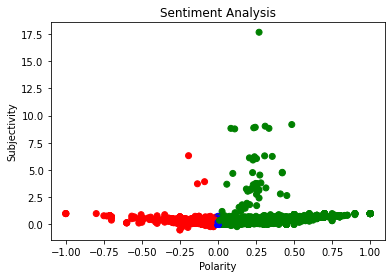

In [ ]:
def visualize_data():
  col = np.where(ds['Sentiment'] == 'Positive','g',np.where(ds['Sentiment'] == 'Negative','r','b'))
  fig, ax = plt.subplots()
  scatter = ax.scatter(ds['Polarity'],ds['Subjectivity'], c = col)
  
  ax.set_title('Sentiment Analysis')
  ax.set_xlabel('Polarity')
  ax.set_ylabel('Subjectivity')


visualize_data()



# Part 04 : Build ML-Models 

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix


df = mx_rev.drop('Title',axis = 1) 
X_train , X_test , y_train , y_test = train_test_split(df,y,test_size = 0.2)


params = {
    'kernel' : ['poly','rbf'],
    'C' : [1,2,5,10,20,50,100,200,1000,2000,5000],
    'gamma' : [1e-1,1e-2,1e-3, 1e-4,1e-5],
    'degree' : [2,3],
    'decision_function_shape' : ['ovo','ovr'],

}

params = {
    'kernel' : ['rbf'],
    'C' : [1000,2000,5000],
    'gamma' : [1e-1,1e-2,1e-3, 1e-4,1e-5],
    'decision_function_shape' : ['ovo','ovr'],
}

params = {
    'kernel' : ['rbf'],
    'C' : [1000,2000,5000],
    'gamma' : [1e-3, 1e-4],
    'decision_function_shape' : ['ovo','ovr'],
}

svm = SVC()
grid = GridSearchCV(svm,param_grid = params)

svm = SVC(kernel='rbf', gamma= 0.001 , decision_function_shape='ovo', C= 1000)
svm.fit(X_train,y_train)





SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8673535093367676
              precision    recall  f1-score   support

          -1       0.64      0.42      0.51       171
           0       0.77      0.70      0.73       173
           1       0.90      0.95      0.93      1209

    accuracy                           0.87      1553
   macro avg       0.77      0.69      0.72      1553
weighted avg       0.86      0.87      0.86      1553



# KNN Model 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.7160334835801674

# Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression

model_log_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)
model_log_regression.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_log_regression.score(X_test,y_test)

0.8589826142949131

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import classification_report


y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7392144236960722
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        80
           0       0.73      1.00      0.84      1097
           1       1.00      0.14      0.24       376

    accuracy                           0.74      1553
   macro avg       0.58      0.38      0.36      1553
weighted avg       0.76      0.74      0.65      1553



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
